In [1]:
import numpy as np

In [2]:
#pick k subset of list L
#does not work becase of possible repeat integers
#def random_subset(L, k):
#    s = len(L)
#    L = np.array(L)
#    #indices to be chosen
#    R = s*np.random.rand(k)
#    index = R.astype(int)
#    return L[index]


In [5]:
#INPUT:
#L: list to randomly choose subset from
#k: k sized subset tp pick from array
#OUTPUT:
#subset: the random subset array picked from original list
def rand_subset(L, k):
    s = len(L)
    items = np.linspace(0,s-1,s).astype(int)
    np.random.shuffle(items)
    index = items[:k]
    L = np.array(L)
    subset = L[index]
    return subset

In [4]:
list = [0,5,10,15,20]
random_subset(list,2)

NameError: name 'random_subset' is not defined

In [5]:
rand_subset(list,2)

array([15, 20])

In [6]:
M = np.array([])
for i in range(100000):
    M = np.append(M,rand_subset(list,3))

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

[15.  5.  0. ...  5. 10. 15.]
300000


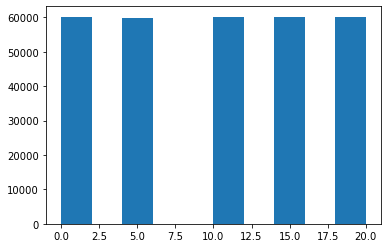

In [8]:
print(M)
print(M.size)
hist = plt.hist(M)
plt.show()

In [9]:
nums = hist[0][[0,2,5,7,9]]

In [10]:
print(nums)
avg = np.average(nums)

[60049. 59719. 60017. 60210. 60005.]


In [11]:
np.sqrt(np.std(nums))

12.593804395708721

In [7]:
#INPUT:
#arr: array of values
#n: top n to return
#OUTPUT:
# elements: top n elements in list as array 
def selection(arr, n):
    arr = -np.array(arr)
    arr_sort = -np.sort(arr)
    elements = arr_sort[:n]
    return elements

In [8]:
ar = [1,5,4,7,6,9]
selection(ar,4)

array([9, 7, 6, 5])

In [9]:
#INPUTS:

#OUTPUTS:
#population: new iteration of list including
#           elements of last list and and randomized
#           rest of subset population.
def repopulate(elements, subset,L, k, n):
    #amount r needed to repopulate
    r = k - n
    #remove elements already included
    remain = np.setdiff1d(arr,subset)
    # pick r new people
    rest = rand_subset(remain, r)
    #new people join old population
    new_pop = np.concatenate((subset, rest))
    return new_pop

In [10]:
arr = np.array(ar)
bool_arr = (arr == 1) 
np.argwhere(arr)


array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [11]:
bool_arr = (arr == 9) 
bool_arr

array([False, False, False, False, False,  True])

In [12]:
bool_arr = (arr == i for i in sub)
bool_arr =

SyntaxError: invalid syntax (<ipython-input-12-1f267a23f887>, line 2)

In [ ]:
sub = [1,9]
bool_arr = (arr == i for i in sub)

In [ ]:
bool_arr


In [ ]:
ar = [1,5,4,7,6,9]
np.setdiff1d(ar,[1,9])

In [ ]:
np.concatenate((ar,ar))

In [13]:
#Imagine minimization problem: F*a=y (or a*f(x)=y, a linear parameter)
#Find the a that gets F*a closest to y
#F is mxn matrix with columns populated
#by n different f_j(x) functions or features
#a is n-vector, y is an m-vector
#We are optimizing over a's 
#but stochastic over the choice i's,
#the different row of equations
# which is also the equivalent number of loss fucntions

#Possible function space 
#(create your own, make sure to update both)
#a: parameters needing optimization (size n), use numpy array
#x: 1d positional scalar 
#   (may have n variational functionals f_j(x) )
#   i.e, a_0*f_0(x)+a_1*f_1(x)+...+a_n*f_n(x)

def F(x):
    return np.array([1,x,x**2,x**3])

def f(a,x) :
    #x = .7
    #a = [1,3,5,4]
    #F = np.array([1,x,x**2,x**3])
    F1 = F(x)
    return np.dot(a,F1)

#Exact gradient of f(a,x), linear in a, in repsect to 'a'
def grad_f(a,x):
    #x = .7
    #a = [1,3,5,4]
    grad_F = F(x)
    return F(x)

#Possible optional generator of data y
#Instead import your own data
#a linear factors (numpy array)
#x x values in f(a,x) (scalar or numpy array)
#s: variance/size of noise
#norm: variance dependence on size of f(a,x)

def Y(a,x,s = 1, norm = False):
    m = x.size
    if norm == False:
        return np.array([x, f(a,x) + np.random.normal(0,s,m)])
    else:
        f0 = f(a,x)
        nor = np.zeros(m)
        for i in range(m):
            nor[i] = np.absolute(f0[i])
        return np.array([x,f0 + nor*np.random.normal(0,s,m)])
            
#Example loss function to be optimized
#Note the f(a,x) is better updated as
#a global variable between iterations

#a: array of linear coefficients
#x: scalar of absicca
#y: scalar of ordiante 
def phi(a,x,y):
    return (f(a,x) - y)^2


#Given phi loss function above
#Local Gradient
def grad_phi(a,x,y):
    return 2*(f(a,x)-y)*grad_f(a,x)

In [ ]:
nums = np.array([1,-2,3,4,5,-6,10])
nums/(np.ones(nums.size)*2)

In [14]:
#Main Evolutionary Stochastic Gradient Descent Algorithm
#INPUTS:
#a0: intial guess for parameters a (can be randomly assigned or zero vector)
#C: coordinate data [x,y] x grouped and y grouped
#K: size of stochastic subset of data to gradient-step in
#eta: learning-rate/stepping size
#num: number of iterations/steps
def evSGD(a0, C, eta, K, num):
    #size of Operator
    m = np.size(C,1)
    n = np.size(a0)
    
    A = np.array((num,n))
    A[0] = a0
    L = [i for i in range(m)]
    
    for l in range(1,Num):
        
        L_k = rand_subset(L,K)

        G = np.zeros(m)
        for j in L_k:
            G = G + grad_phi(a0,C[0][j],C[1][j])

        A[l] = A[l-1] - eta*G
        
    return A

    
    
    
    

<ipython-input-13-58f3b9d34787>:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array([1,x,x**2,x**3])


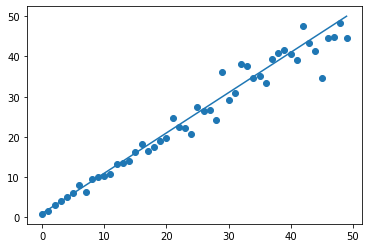

In [17]:
M = Y(np.array([1,1,0,0]),np.array([i for i in range(50)]), s = .1, norm = True)
plt.scatter(M[0],M[1])
Z = np.linspace(np.amin(M[0]),np.max(M[0]),100)
W = 1 + Z
plt.plot(Z,W)
plt.show()

In [37]:
C = np.array([[1,2],[3,40],[4,5]])
np.size(C,0)

3

In [39]:
C[0][0]

1